In [2]:
!pip install tensorflow
!pip install matplotlib
!pip install scipy



import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
train_dir = r'C:\Users\supha\Documents\65011048\fruits-360_dataset_100x100\fruits-360\Training'
test_dir = r'C:\Users\supha\Documents\65011048\fruits-360_dataset_100x100\fruits-360\Test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.2,1.0],  # ปรับความสว่าง
    fill_mode='nearest'
)



test_datagen = ImageDataGenerator(rescale=1./255)



In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical'
)


Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(100, 100, 3)),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # เพิ่ม Dropout เพื่อลด overfitting
    
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping] 
)

Epoch 1/25
1101/1101 [==============================] - 1096s 995ms/step - loss: 1.0654 - accuracy: 0.7905 - val_loss: 0.7192 - val_accuracy: 0.9232
Epoch 2/25
1101/1101 [==============================] - 1163s 1s/step - loss: 0.9743 - accuracy: 0.8160 - val_loss: 0.7363 - val_accuracy: 0.9236
Epoch 3/25
1101/1101 [==============================] - 1149s 1s/step - loss: 0.9052 - accuracy: 0.8344 - val_loss: 0.7130 - val_accuracy: 0.9212
Epoch 4/25
1101/1101 [==============================] - 1062s 965ms/step - loss: 0.8528 - accuracy: 0.8504 - val_loss: 0.7513 - val_accuracy: 0.9170
Epoch 5/25
1101/1101 [==============================] - 1000s 908ms/step - loss: 0.8122 - accuracy: 0.8607 - val_loss: 0.7269 - val_accuracy: 0.9169
Epoch 6/25
1101/1101 [==============================] - 1118s 1s/step - loss: 0.7865 - accuracy: 0.8682 - val_loss: 0.7416 - val_accuracy: 0.9226
Epoch 7/25
1101/1101 [==============================] - 1130s 1s/step - loss: 0.7654 - accuracy: 0.8739 - val_loss:

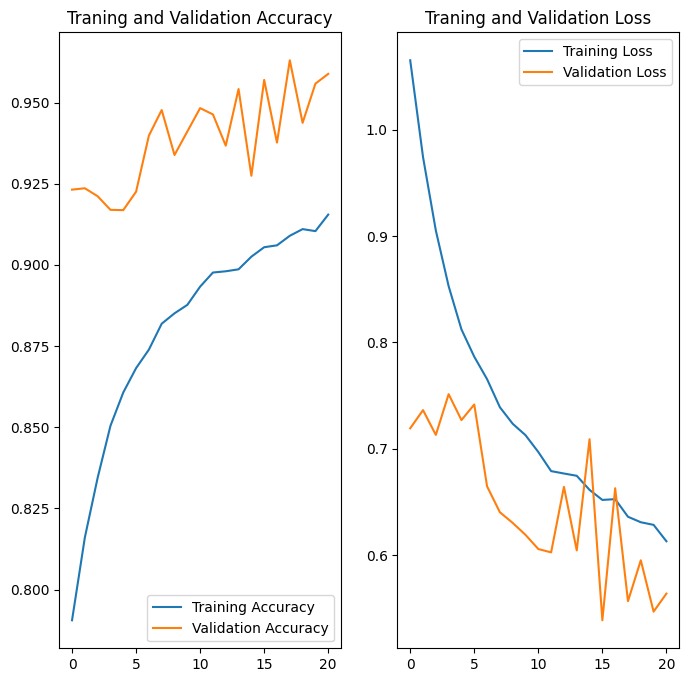

In [21]:
# import matplotlib.pyplot as plt


# acc = history.history['accuracy']
# loss = history.history['loss']


# epochs_range = range(len(acc)) 
# plt.figure(figsize=(8, 8))


# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training Accuracy')


# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.legend(loc='upper right')
# plt.title('Training Loss')

# plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(21)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Traning and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Traning and Validation Loss')
plt.show()

In [19]:
from tensorflow.keras.preprocessing import image


img_path = r'C:\Users\supha\Documents\65011048\fruits-360_dataset_100x100\fruits-360\Training\Watermelon 1\0_100.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())

print(f'predict: {class_labels[predicted_class[0]]}')


1/1 [==============================] - 0s 427ms/step
predict: Watermelon 1


In [20]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image


url = 'https://static.libertyprim.com/files/varietes/pomme-akane-large.jpg?1569320193'


response = requests.get(url)
img = Image.open(BytesIO(response.content))


img = img.resize((100, 100))


img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())

print(f'predict: {class_labels[predicted_class[0]]}')


1/1 [==============================] - 0s 44ms/step
predict: Pear Red 1
